#### RFM은 Recency, Frequency, Monetary 의 약자

- Recency : 최근성
- Frequency : 빈번함
- Monetary : 양 (현재 데이터에서는 결제한 총 금액)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context='notebook',
              style='darkgrid',
              palette='pastel',
              font='Malgun Gothic',
              rc=custom_params)

In [4]:
sales_data = pd.read_csv("sales_05_8.csv")
sales_data.head()

,Install,Time_stamp,Status,ID,Payment,Game_Name
0,2022-01-14,2022-01-27,purchase,Heidi_635,19900,Soccer Manager
1,2022-03-10,2022-03-13,purchase,Courtney_067,900,Mine Ground
2,2022-02-13,2022-02-19,purchase,David_737,9900,Soccer Manager
3,2022-02-07,2022-02-25,purchase,Lindsay_820,4900,Mine Ground
4,2022-03-06,2022-03-10,purchase,Jon_823,49900,Soccer Manager


In [5]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75087 entries, 0 to 75086
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Install     75087 non-null  object
 1   Time_stamp  75087 non-null  object
 2   Status      75087 non-null  object
 3   ID          75087 non-null  object
 4   Payment     75087 non-null  int64 
 5   Game_Name   75087 non-null  object
dtypes: int64(1), object(5)
memory usage: 3.4+ MB


In [6]:
sales_data["ID"].nunique()

52672

In [7]:
# datetime형 칼럼 생성 및, 기존 칼럼 datetime형으로 변경
sales_data["Now"] = pd.to_datetime("2022-06-10")
sales_data["Time_stamp"] = pd.to_datetime(sales_data["Time_stamp"])
sales_data = sales_data[sales_data["Status"] == "purchase"]
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27682 entries, 0 to 27681
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Install     27682 non-null  object        
 1   Time_stamp  27682 non-null  datetime64[ns]
 2   Status      27682 non-null  object        
 3   ID          27682 non-null  object        
 4   Payment     27682 non-null  int64         
 5   Game_Name   27682 non-null  object        
 6   Now         27682 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 1.7+ MB


In [8]:
sales_data["Interval"] = sales_data["Now"] - sales_data["Time_stamp"]
sales_data.head()

,Install,Time_stamp,Status,ID,Payment,Game_Name,Now,Interval
0,2022-01-14,2022-01-27,purchase,Heidi_635,19900,Soccer Manager,2022-06-10,134 days
1,2022-03-10,2022-03-13,purchase,Courtney_067,900,Mine Ground,2022-06-10,89 days
2,2022-02-13,2022-02-19,purchase,David_737,9900,Soccer Manager,2022-06-10,111 days
3,2022-02-07,2022-02-25,purchase,Lindsay_820,4900,Mine Ground,2022-06-10,105 days
4,2022-03-06,2022-03-10,purchase,Jon_823,49900,Soccer Manager,2022-06-10,92 days


In [9]:
RFM_data = sales_data.groupby(["ID"]).agg({"Interval": "min", "ID": "count", "Payment": "sum"})
RFM_data.head()

,Interval,ID,Payment
ID,,,
Aaron_027,60 days,5,40500
Aaron_031,102 days,5,17500
Aaron_077,40 days,4,26600
Aaron_165,21 days,4,49600
Aaron_224,108 days,1,900


In [10]:
RFM_data.columns = ["Recency", "Frequency", "Monetary"]
RFM_data.head()

,Recency,Frequency,Monetary
ID,,,
Aaron_027,60 days,5,40500
Aaron_031,102 days,5,17500
Aaron_077,40 days,4,26600
Aaron_165,21 days,4,49600
Aaron_224,108 days,1,900


In [11]:
RFM_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5267 entries, Aaron_027 to Zoe_638
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   Recency    5267 non-null   timedelta64[ns]
 1   Frequency  5267 non-null   int64          
 2   Monetary   5267 non-null   int64          
dtypes: int64(2), timedelta64[ns](1)
memory usage: 164.6+ KB


In [12]:
# 열에서 날짜 차이를 일(day) 단위로 추출하는 메서드인 dt.days
RFM_data["Recency"] = RFM_data["Recency"].dt.days
RFM_data

,Recency,Frequency,Monetary
ID,,,
Aaron_027,60,5,40500
Aaron_031,102,5,17500
Aaron_077,40,4,26600
Aaron_165,21,4,49600
Aaron_224,108,1,900
...,...,...,...
Zachary_937,101,4,11600
Zachary_948,48,5,26500
Zoe_163,11,5,105500


In [13]:
RFM_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5267 entries, Aaron_027 to Zoe_638
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    5267 non-null   int64
 1   Frequency  5267 non-null   int64
 2   Monetary   5267 non-null   int64
dtypes: int64(3)
memory usage: 164.6+ KB


In [14]:
RFM_data.describe()
# 표준편차는 평균을 중심으로 각 요소 값들이 얼마나 떨어져 있나를 나타냄
# 표준편차가 75%값을 벗어나는 경우 데이터가 넓게 흩어져 있다는 의미가 됨
# 25%~75% 사분위수 범위

,Recency,Frequency,Monetary
count,5267.000000,5267.000000,5267.000000
mean,66.517752,5.255743,50340.003797
std,35.684775,6.995041,73012.364791
min,7.000000,1.000000,900.000000
25%,36.000000,1.000000,9900.000000
50%,61.000000,5.000000,29900.000000
75%,94.000000,5.000000,55500.000000
max,158.000000,37.000000,582700.000000


In [26]:
# Recency 기준 정렬
temp_var = RFM_data.sort_values(by=["Recency"], ascending=False)
temp_var.head()

,Recency,Frequency,Monetary
ID,,,
Nancy_218,158,1,900
Michael_254,155,1,900
Craig_831,155,1,19900
Matthew_192,154,1,900
Greg_925,154,1,900


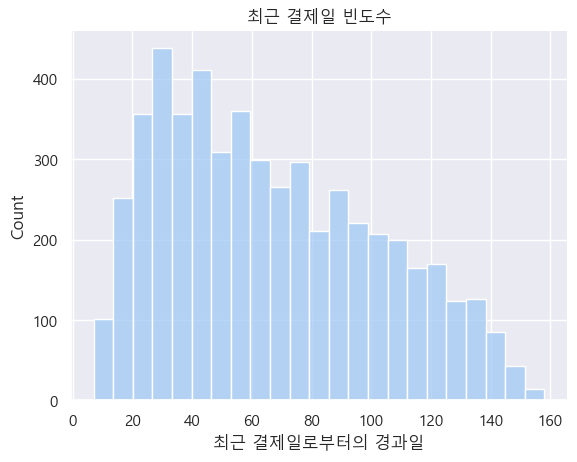

In [27]:
sns.histplot(data=temp_var["Recency"])
plt.title("최근 결제일 빈도수")
plt.xlabel("최근 결제일로부터의 경과일")
plt.show()

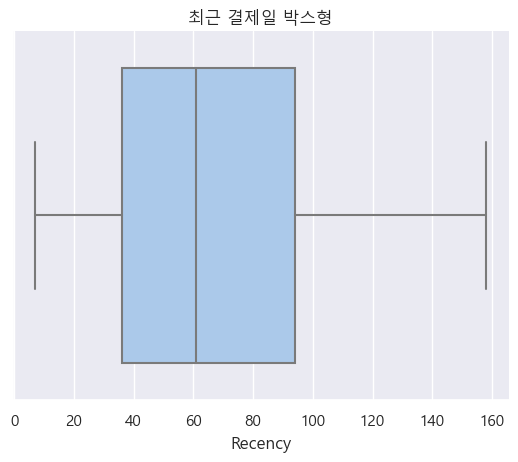

In [28]:
sns.boxplot(data=temp_var, x="Recency")
plt.title("최근 결제일 박스형")
plt.show()

In [29]:
temp_var = RFM_data.sort_values(by="Frequency", ascending=False)
temp_var.head()

,Recency,Frequency,Monetary
ID,,,
Jacob_633,33,37,294300
Steven_767,23,37,391300
Wayne_179,56,37,381300
Michael_443,54,37,364300
Robert_522,25,37,306300


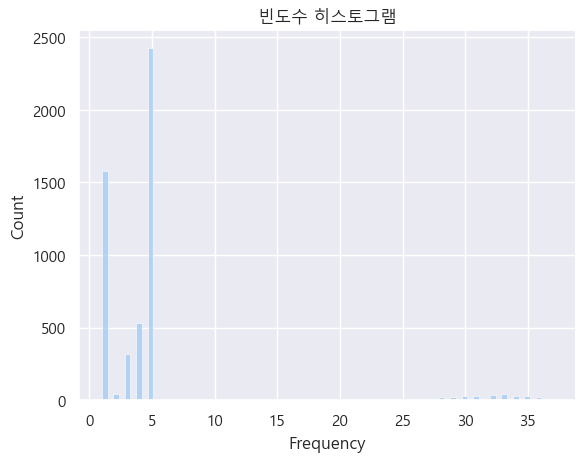

In [30]:
sns.histplot(data=temp_var, x="Frequency")
plt.title("빈도수 히스토그램")
plt.show()

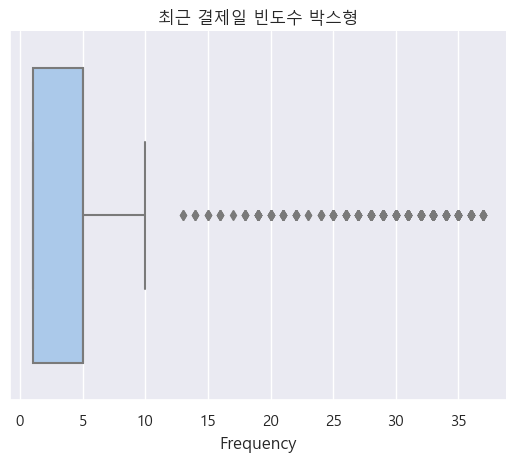

In [31]:
sns.boxplot(data=temp_var, x="Frequency")
plt.title("최근 결제일 빈도수 박스형")
plt.show()

In [32]:
temp_var = RFM_data.sort_values(by="Monetary", ascending=False)
temp_var.head()

,Recency,Frequency,Monetary
ID,,,
Nancy_098,26,33,582700
Linda_829,114,32,561800
Caleb_717,30,37,555300
Grace_792,87,35,551500
Sarah_679,71,33,486700


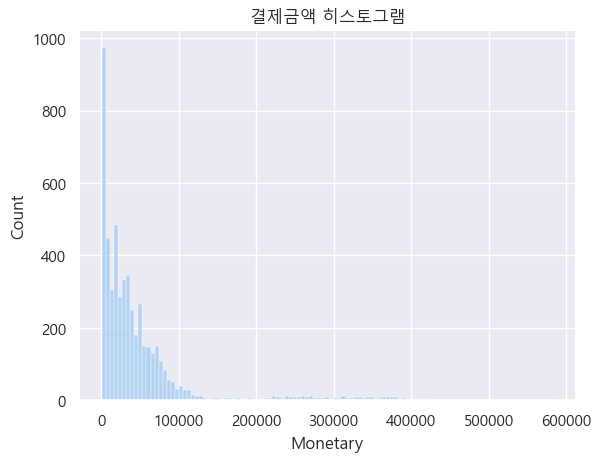

In [33]:
sns.histplot(data=temp_var, x="Monetary")
plt.title("결제금액 히스토그램")
plt.show()

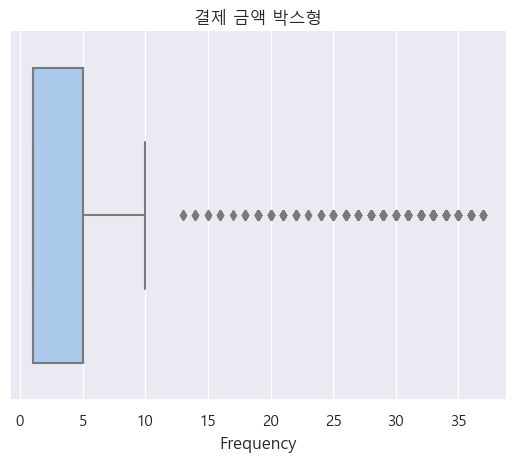

In [34]:
sns.boxplot(data=temp_var, x="Frequency")
plt.title("결제 금액 박스형")
plt.show()

In [36]:
# RFM 점수 구하기 (정규화하기)(상대평가점수)
# 해당데이터에서 Recency는 수치가 낮아야 점수가 높음
RFM_data["R_score"] = np.interp(RFM_data["Recency"], (RFM_data["Recency"].min(), RFM_data["Recency"].max()),
                                (100, 1)).round(2)
RFM_data.head()

,Recency,Frequency,Monetary,R_score
ID,,,,
Aaron_027,60,5,40500,65.25
Aaron_031,102,5,17500,37.72
Aaron_077,40,4,26600,78.36
Aaron_165,21,4,49600,90.82
Aaron_224,108,1,900,33.78


In [37]:
RFM_data["F_score"] = np.interp(RFM_data["Frequency"], (RFM_data["Frequency"].min(), RFM_data["Frequency"].max()),
                                (1, 100)).round(2)
RFM_data.head()

,Recency,Frequency,Monetary,R_score,F_score
ID,,,,,
Aaron_027,60,5,40500,65.25,12.00
Aaron_031,102,5,17500,37.72,12.00
Aaron_077,40,4,26600,78.36,9.25
Aaron_165,21,4,49600,90.82,9.25
Aaron_224,108,1,900,33.78,1.00


In [38]:
RFM_data["M_score"] = np.interp(RFM_data["Monetary"], (RFM_data["Monetary"].min(), RFM_data["Monetary"].max()),
                                (1, 100)).round(2)
RFM_data.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score
ID,,,,,,
Aaron_027,60,5,40500,65.25,12.00,7.74
Aaron_031,102,5,17500,37.72,12.00,3.82
Aaron_077,40,4,26600,78.36,9.25,5.37
Aaron_165,21,4,49600,90.82,9.25,9.29
Aaron_224,108,1,900,33.78,1.00,1.00


In [39]:
# 각 스코어의 평균치를 전체 점수로 하기
RFM_data["RFM_score"] = ((RFM_data["R_score"] + RFM_data["F_score"] + RFM_data["M_score"]) / 3).round(2)
RFM_data.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
ID,,,,,,,
Aaron_027,60,5,40500,65.25,12.00,7.74,28.33
Aaron_031,102,5,17500,37.72,12.00,3.82,17.85
Aaron_077,40,4,26600,78.36,9.25,5.37,30.99
Aaron_165,21,4,49600,90.82,9.25,9.29,36.45
Aaron_224,108,1,900,33.78,1.00,1.00,11.93


In [41]:
# 스코어를 기준으로 범위에따라 class 지정
# 전체의 40%,25%,20%,14%,1% 순
RFM_data["Class"] = pd.qcut(RFM_data["RFM_score"], q=[0, 0.4, 0.65, 0.85, 0.99, 1], labels=[5, 4, 3, 2, 1])
RFM_data.reset_index(inplace=True)
RFM_data.head()

,ID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Class
0,Aaron_027,60,5,40500,65.25,12.00,7.74,28.33,4
1,Aaron_031,102,5,17500,37.72,12.00,3.82,17.85,5
2,Aaron_077,40,4,26600,78.36,9.25,5.37,30.99,3
3,Aaron_165,21,4,49600,90.82,9.25,9.29,36.45,2
4,Aaron_224,108,1,900,33.78,1.00,1.00,11.93,5


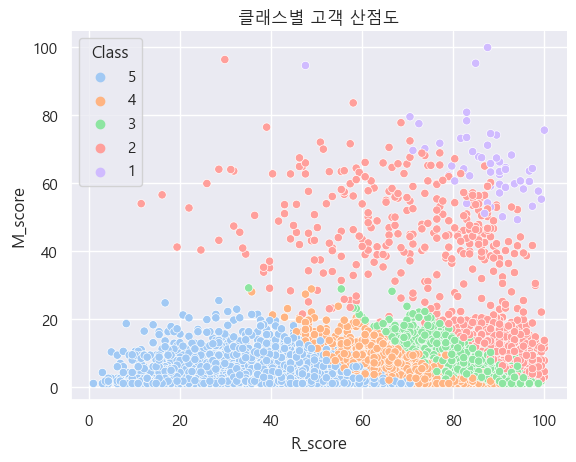

In [45]:
sns.scatterplot(data=RFM_data, x="R_score", y="M_score", hue="Class")
plt.title("클래스별 고객 산점도")
plt.show()

In [46]:
temp_var = RFM_data["ID"].groupby(RFM_data["Class"]).count()
temp_var

Class
5    2109
4    1319
3    1049
2     737
1      53
Name: ID, dtype: int64

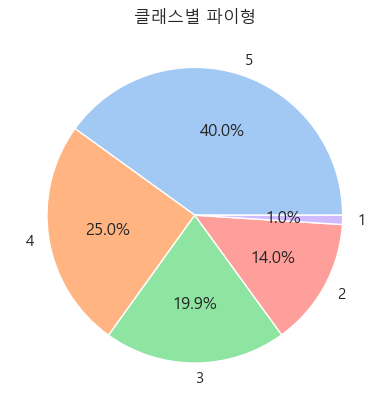

In [48]:
plt.pie(temp_var, labels=temp_var.index, autopct="%1.1f%%")
plt.title("클래스별 파이형")
plt.show()

In [61]:
# Class를 기준으로 RFM 평균값 집계
temp_var = RFM_data.groupby("Class").agg({"Recency":"mean", "Frequency":"mean", "Monetary":"mean"}).round(1)
temp_var

,Recency,Frequency,Monetary
Class,,,
5,101.7,2.7,23367.4
4,55.0,3.6,32101.2
3,34.3,4.3,40620.6
2,35.1,15.0,150000.1
1,27.2,33.9,384081.1


In [62]:
# 단순 전치행렬 변경 해보기
temp_var.T

Class,5,4,3,2,1
Recency,101.7,55.0,34.3,35.1,27.2
Frequency,2.7,3.6,4.3,15.0,33.9
Monetary,23367.4,32101.2,40620.6,150000.1,384081.1


In [63]:
# 인덱스 타입을 보면 category라서 시각화에 쓰기 까다롭다. 정수형으로 바꿔야함
temp_var.index

CategoricalIndex([5, 4, 3, 2, 1], categories=[5, 4, 3, 2, 1], ordered=True, dtype='category', name='Class')

In [64]:
temp_var.index = temp_var.index.tolist()
temp_var

,Recency,Frequency,Monetary
5,101.7,2.7,23367.4
4,55.0,3.6,32101.2
3,34.3,4.3,40620.6
2,35.1,15.0,150000.1
1,27.2,33.9,384081.1


In [65]:
temp_var = temp_var.reset_index()
temp_var

,index,Recency,Frequency,Monetary
0,5,101.7,2.7,23367.4
1,4,55.0,3.6,32101.2
2,3,34.3,4.3,40620.6
3,2,35.1,15.0,150000.1
4,1,27.2,33.9,384081.1


In [66]:
temp_var = temp_var.rename(columns={"index":"Class"})
temp_var

,Class,Recency,Frequency,Monetary
0,5,101.7,2.7,23367.4
1,4,55.0,3.6,32101.2
2,3,34.3,4.3,40620.6
3,2,35.1,15.0,150000.1
4,1,27.2,33.9,384081.1


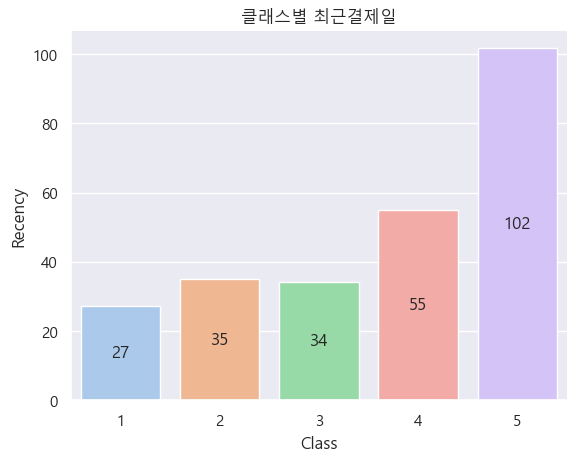

In [69]:
ax = sns.barplot(data = temp_var, x="Class", y="Recency")
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('클래스별 최근결제일')
plt.show()

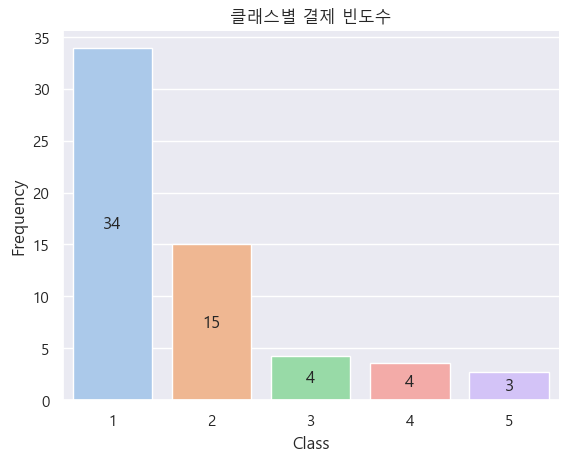

In [68]:
ax = sns.barplot(data=temp_var, x='Class', y='Frequency')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('클래스별 결제 빈도수')
plt.show()

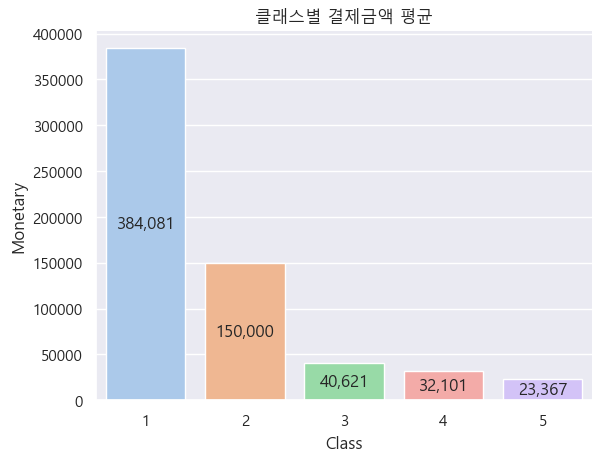

In [71]:
ax = sns.barplot(data=temp_var, x='Class', y='Monetary')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('클래스별 결제금액 평균')
plt.show()

In [73]:
VIP_customer = RFM_data[RFM_data['Class'] == 1]
VIP_customer.head()

,ID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Class
180,Amanda_596,25,33,342700,88.20,89.00,59.16,78.79,1
290,Andrew_661,20,33,374700,91.48,89.00,64.61,81.70,1
355,Ann_400,22,32,345800,90.17,86.25,59.69,78.70,1
378,Anne_496,12,32,368800,96.72,86.25,63.60,82.19,1
493,Ashley_869,35,36,425400,81.64,97.25,73.23,84.04,1


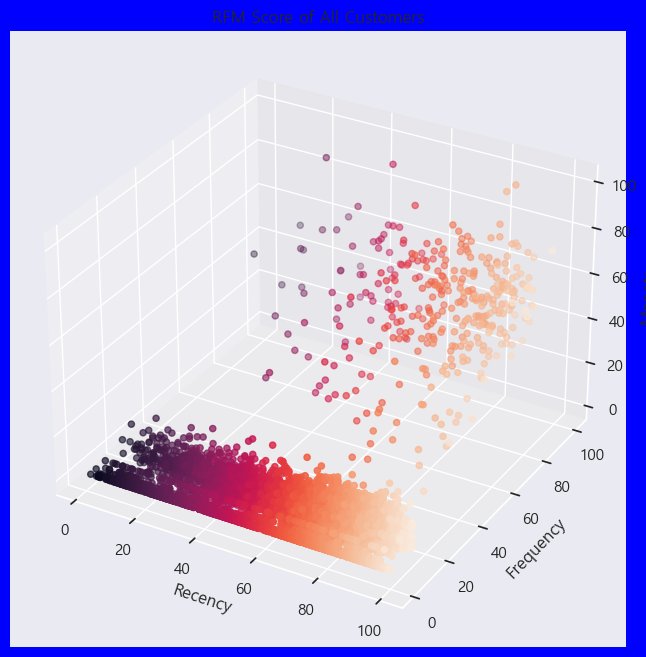

In [81]:
# 필요한 라이브러리를 호출합니다.
from mpl_toolkits.mplot3d import Axes3D

# 시각화를 위해 필요한 Figure와 ax를 정의합니다.
fig=plt.figure(figsize=(8,8),facecolor="blue")
ax = fig.add_subplot(111, projection = '3d')

# x축, y축, z축에 각 데이터를 할당합니다.
x = RFM_data['R_score']
y = RFM_data['F_score']
z = RFM_data['M_score']

# x축, y축, z축에 각 레이블을 부여합니다. .
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# 산포도 형태의 3차원 시각화를 수행합니다.
# 이때 색깔은 x축을 기준으로 합니다.
ax = ax.scatter(x,y,z, c=x)

plt.title('RFM Score of All Customers')
plt.show()